Using agents column: Have you ever written an `agents.md`, modified your `.claude` directory, or added context specifically for agents in other way?


/var/folders/k7/nk16v26j38j_mcwrggjp5tpc0000gn/T/ipykernel_91762/1322573675.py:171: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


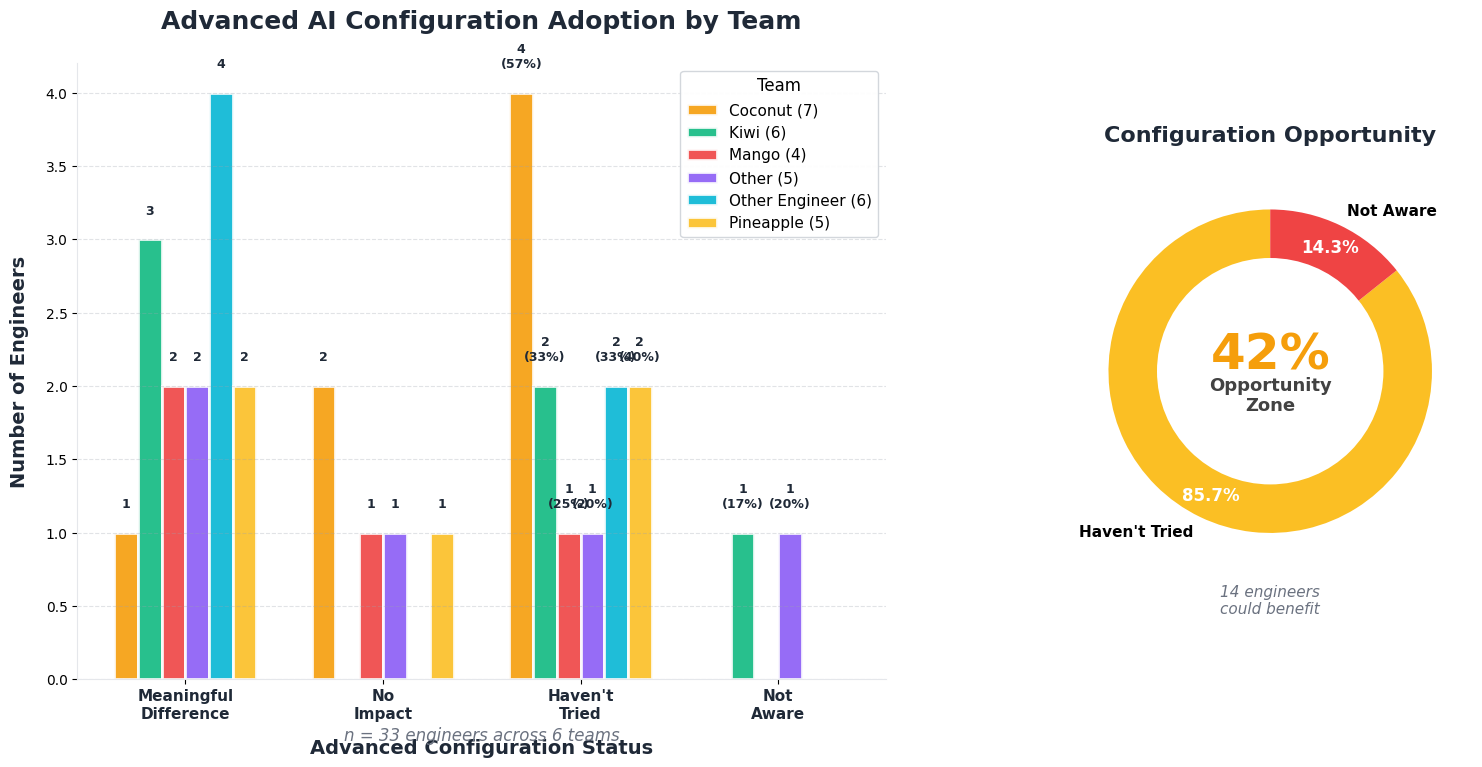


ADVANCED CONFIGURATION ADOPTION BY TEAM

📊 Total Engineers: 33

📈 Team-by-Team Breakdown:
Team                 Meaningful    No Impact    Haven't Tried   Not Aware    Total   
Coconut              1             2            4               0            7       
Kiwi                 3             0            2               1            6       
Mango                2             1            1               0            4       
Other                2             1            1               1            5       
Other Engineer       4             0            2               0            6       
Pineapple            2             1            2               0            5       

⭐ Adoption Rate by Team (% who tried advanced config):
   • Coconut: 43% tried (3/7)
     └─ 33% of those found it helpful
   • Kiwi: 50% tried (3/6)
     └─ 100% of those found it helpful
   • Mango: 75% tried (3/4)
     └─ 67% of those found it helpful
   • Other: 60% tried (3/5)
     └─ 67% of those fo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get column names
team_col = 'Which team are you a part of?'
agents_col = df_filtered.columns[16]  # Column Q - Advanced config

print(f"Using agents column: {agents_col}")

# Define agents.md order
agents_order = [
    'Yes -- and it made a meaningful difference',
    'Yes -- but I didn\'t notice much impact',
    'No -- I know it\'s possible but haven\'t taken the time',
    'No -- I wasn\'t aware that was possible'
]

# Shortened labels for x-axis
x_labels = [
    'Meaningful\nDifference',
    'No\nImpact',
    'Haven\'t\nTried',
    'Not\nAware'
]

# Create crosstab (teams × advanced config categories)
team_agents_crosstab = pd.crosstab(df_filtered[team_col], df_filtered[agents_col])
team_agents_crosstab = team_agents_crosstab.reindex(columns=agents_order, fill_value=0)

# Get list of teams
teams = team_agents_crosstab.index.tolist()

# Calculate totals for "Haven't tried" and "Not aware" across all teams
total_engineers = len(df_filtered)
havent_tried_total = team_agents_crosstab[agents_order[2]].sum()
not_aware_total = team_agents_crosstab[agents_order[3]].sum()
opportunity_total = havent_tried_total + not_aware_total

# Create figure with two subplots
fig = plt.figure(figsize=(18, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[3, 1], wspace=0.3)
ax = fig.add_subplot(gs[0, 0])  # Bar chart on left
ax2 = fig.add_subplot(gs[0, 1])  # Donut chart on right

# Modern, appealing color palette - distinct vibrant colors
team_colors = {
    'Kiwi': '#10B981',        # Green (kiwi is green)
    'Coconut': '#F59E0B',     # Amber/orange (coconut is warm)
    'Mango': '#EF4444',       # Red (mango is orange-red)
    'Pineapple': '#FBBF24',   # Yellow/gold (pineapple is yellow)
    'Other': '#8B5CF6',       # Purple (distinct)
    'Other Engineer': '#06B6D4'  # Cyan (distinct from others)
}

# Set up bar positions
x = np.arange(len(agents_order))
width = 0.12  # Width of each bar
n_teams = len(teams)

# Calculate starting position to center the groups
total_width = width * n_teams
offset = total_width / 2 - width / 2

# Plot bars for each team
for i, team in enumerate(teams):
    team_data = team_agents_crosstab.loc[team].values
    position = x - offset + (i * width)
    
    # Calculate total for this team
    team_total = team_data.sum()
    
    color = team_colors.get(team, '#9CA3AF')
    bars = ax.bar(position, team_data, width, 
                  label=f'{team} ({int(team_total)})', color=color, 
                  edgecolor='white', linewidth=2, alpha=0.9)
    
    # Add count labels on bars
    for j, (bar, count) in enumerate(zip(bars, team_data)):
        height = bar.get_height()
        if count > 0:
            # Calculate percentage for this category
            pct = (count / team_total * 100) if team_total > 0 else 0
            
            # For "Haven't tried" (index 2) and "Not aware" (index 3), show count and percentage
            if j == 2 or j == 3:  # Haven't tried or Not aware
                label_text = f'{int(count)}\n({pct:.0f}%)'
            else:
                label_text = f'{int(count)}'
            
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.15,
                   label_text,
                   ha='center', va='bottom', fontsize=9, weight='bold', color='#1F2937')

# Customize plot
ax.set_xlabel('Advanced Configuration Status', fontsize=14, weight='bold', color='#1F2937', labelpad=12)
ax.set_ylabel('Number of Engineers', fontsize=14, weight='bold', color='#1F2937', labelpad=12)
ax.set_title('Advanced AI Configuration Adoption by Team', 
            fontsize=18, weight='bold', pad=25, color='#1F2937')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=11, weight='bold', color='#1F2937')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#E5E7EB')
ax.spines['bottom'].set_color('#E5E7EB')
ax.grid(axis='y', alpha=0.3, linestyle='--', color='#9CA3AF', zorder=0)
ax.legend(title='Team', fontsize=11, title_fontsize=12, 
          loc='upper right', framealpha=0.95, edgecolor='#D1D5DB', fancybox=True)

# Add subtitle
plt.text(0.5, -0.1, f'n = {total_engineers} engineers across {len(teams)} teams', 
         ha='center', transform=ax.transAxes,
         fontsize=12, style='italic', color='#6B7280')

# ===== DONUT CHART: Opportunity Analysis =====
# Prepare data for donut chart
haven_tried_label = "Haven't Tried"
donut_labels = [haven_tried_label, 'Not Aware']
donut_values = [havent_tried_total, not_aware_total]
donut_colors = ['#FBBF24', '#EF4444']  # Yellow for haven't tried, Red for not aware

# Calculate percentages
donut_pcts = [(v / total_engineers * 100) if total_engineers > 0 else 0 for v in donut_values]
opportunity_pct = (opportunity_total / total_engineers * 100) if total_engineers > 0 else 0

# Create donut chart
wedges, texts, autotexts = ax2.pie(
    donut_values,
    labels=donut_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=donut_colors,
    textprops={'fontsize': 11, 'weight': 'bold'},
    pctdistance=0.85
)

# Style percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(centre_circle)

# Add center text with opportunity percentage
ax2.text(0, 0.1, f'{opportunity_pct:.0f}%', 
         ha='center', va='center',
         fontsize=36, weight='bold', color='#F59E0B')
ax2.text(0, -0.15, 'Opportunity\nZone', 
         ha='center', va='center',
         fontsize=13, weight='bold', color='#424242')

# Add title
ax2.set_title('Configuration Opportunity', 
              fontsize=16, weight='bold', pad=20, color='#1F2937')

# Add subtitle
ax2.text(0.5, -0.1, f'{int(opportunity_total)} engineers\ncould benefit', 
         ha='center', transform=ax2.transAxes,
         fontsize=11, style='italic', color='#6B7280')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\n" + "="*80)
print("ADVANCED CONFIGURATION ADOPTION BY TEAM")
print("="*80)

print(f"\n📊 Total Engineers: {total_engineers}")

print(f"\n📈 Team-by-Team Breakdown:")
haven_tried_label = "Haven't Tried"
print(f"{'Team':<20} {'Meaningful':<13} {'No Impact':<12} {haven_tried_label:<15} {'Not Aware':<12} {'Total':<8}")
print("="*80)

for team in teams:
    row = team_agents_crosstab.loc[team]
    total = row.sum()
    print(f"{team:<20} {int(row[agents_order[0]]):<13} "
          f"{int(row[agents_order[1]]):<12} "
          f"{int(row[agents_order[2]]):<15} "
          f"{int(row[agents_order[3]]):<12} "
          f"{int(total):<8}")

# Calculate adoption rates
print(f"\n⭐ Adoption Rate by Team (% who tried advanced config):")
for team in teams:
    tried = team_agents_crosstab.loc[team, agents_order[:2]].sum()
    total = team_agents_crosstab.loc[team].sum()
    tried_pct = (tried / total * 100) if total > 0 else 0
    
    meaningful = team_agents_crosstab.loc[team, agents_order[0]]
    meaningful_pct = (meaningful / tried * 100) if tried > 0 else 0
    
    print(f"   • {team}: {tried_pct:.0f}% tried ({int(tried)}/{int(total)})")
    print(f"     └─ {meaningful_pct:.0f}% of those found it helpful")

# Identify champion and laggard teams
team_tried_pct = {}
for team in teams:
    tried = team_agents_crosstab.loc[team, agents_order[:2]].sum()
    total = team_agents_crosstab.loc[team].sum()
    team_tried_pct[team] = (tried / total * 100) if total > 0 else 0

champion_team = max(team_tried_pct, key=team_tried_pct.get)
laggard_team = min(team_tried_pct, key=team_tried_pct.get)

print(f"\n✨ Key Insights:")
print(f"   🏆 Champion Team: {champion_team} ({team_tried_pct[champion_team]:.0f}% adoption)")
print(f"   📉 Laggard Team: {laggard_team} ({team_tried_pct[laggard_team]:.0f}% adoption)")
print(f"   📊 Gap: {team_tried_pct[champion_team] - team_tried_pct[laggard_team]:.0f} percentage points")

# Awareness analysis
print(f"\n🔍 Awareness Gap:")
for team in teams:
    not_aware = team_agents_crosstab.loc[team, agents_order[3]]
    total = team_agents_crosstab.loc[team].sum()
    not_aware_pct = (not_aware / total * 100) if total > 0 else 0
    if not_aware_pct > 0:
        print(f"   • {team}: {int(not_aware)} engineers ({not_aware_pct:.0f}%) not aware")

print(f"\n💡 Opportunities:")
for team in teams:
    havent_tried = team_agents_crosstab.loc[team, agents_order[2]]
    not_aware = team_agents_crosstab.loc[team, agents_order[3]]
    opportunity = havent_tried + not_aware
    total = team_agents_crosstab.loc[team].sum()
    opp_pct = (opportunity / total * 100) if total > 0 else 0
    
    if opportunity > 0:
        print(f"   • {team}: {int(opportunity)} engineers ({opp_pct:.0f}%) could benefit from training")

print("\n" + "="*80 + "\n")